## Linear-Regression

In [2]:
import numpy as np

In [3]:
random_data = np.random.random((30,2))

In [4]:
random_data

array([[0.76934799, 0.50767957],
       [0.44214714, 0.17812532],
       [0.85664126, 0.79793953],
       [0.87853954, 0.37263972],
       [0.65590061, 0.78518937],
       [0.19652491, 0.10054092],
       [0.99486257, 0.92956326],
       [0.95645515, 0.50639145],
       [0.49189992, 0.73581789],
       [0.11718071, 0.04140568],
       [0.53216627, 0.23329058],
       [0.26924864, 0.56159218],
       [0.48206974, 0.02850653],
       [0.73050658, 0.01409784],
       [0.27465982, 0.40105375],
       [0.24638422, 0.35120807],
       [0.12184626, 0.17074584],
       [0.02173327, 0.10039107],
       [0.57994822, 0.31156046],
       [0.85603215, 0.76175511],
       [0.1418862 , 0.38637632],
       [0.15458128, 0.20854858],
       [0.21242813, 0.31480912],
       [0.67258969, 0.31215382],
       [0.05735926, 0.33815554],
       [0.89895115, 0.5534879 ],
       [0.70258686, 0.95866843],
       [0.08342092, 0.25402862],
       [0.07705341, 0.91009848],
       [0.72549159, 0.14828357]])

In [5]:
import matplotlib.pyplot as plt

In [6]:
X = random_data[:, 0]

In [7]:
y = random_data[:, 1]

In [8]:
import random

In [9]:
def assmuing_function(x):
    return 13.4 * x + 5 + random.randint(-5, 5)

In [10]:
y = [assmuing_function(x) for x in X]

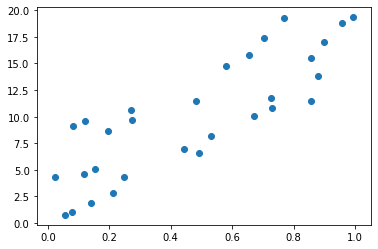

In [11]:
plt.scatter(X, y)

In [12]:
y = np.array(y)

In [13]:
y

array([19.30926311,  6.92477172, 15.47899292, 13.77242982, 15.7890682 ,
        8.63343383, 19.33115846, 18.81649906,  6.59145896,  4.57022145,
        8.13102796, 10.60793176, 11.45973457, 10.78878821,  9.68044155,
        4.30154851,  9.63273985,  4.29122575, 14.7713062 , 11.47083085,
        1.90127512,  5.07138914,  2.846537  , 10.0127019 ,  0.76861411,
       17.04594546, 17.41466386,  9.11784034,  1.03251566, 11.72158724])

In [14]:
import numpy as np

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
reg =  LinearRegression().fit(X.reshape(-1, 1), y)

In [17]:
reg.score(X.reshape(-1, 1), y)

0.707422032831455

In [18]:
reg.coef_
# 斜率

array([14.6913654])

In [19]:
reg.intercept_
# 截距

3.088734622055063

In [20]:
def f(x):
    return reg.coef_ * x + reg.intercept_

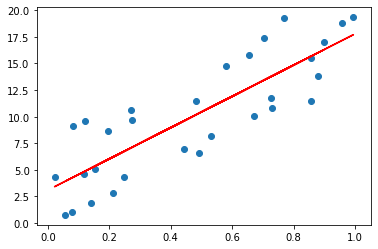

In [21]:
plt.scatter(X, y)
# 散点图
plt.plot(X, f(X), color='red')
# 折线图

In [22]:
reg.predict([[0.9]])

array([16.31096348])

# KNN

In [23]:
def model(X, y):
    return [(Xi, yi) for Xi, yi in zip(X, y)]

In [24]:
from scipy.spatial.distance import cosine

In [25]:
def distance(x1, x2):
    return cosine(x1, x2)

In [26]:
def predict(x, k = 5):
    most_similars = sorted(model(X, y), key=lambda xi: distance(xi[0], x))[:k]
#     most_similars = sorted(model(X, y)，key=lambda xi: distance(xi[0], x))[:k]
    y_hat = [_y for x, _y in most_similars]
    return np.mean(y_hat)

In [27]:
predict(0.9)

15.263719001690205

## Decision Tree

In [28]:
from collections import Counter

In [29]:
from icecream import ic

In [30]:
def entropy(elements):
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
    ic(probs)
    return - sum(p * np.log(p) for p in probs)

In [31]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [32]:
import pandas as pd

In [33]:
dataset = pd.DataFrame.from_dict(mock_data)

In [63]:
def find_the_optimal_spilter(training_data: pd.DataFrame, target: str):

    x_fields = set(training_data.columns.tolist()) - {target}
    spliter = None
    min_entropy = float('inf')
    for f in x_fields:
        ic(f)
        values = set(training_data[f])
        ic(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            ic(sub_spliter_1)
            # split by the current feature and one value
            entropy_1 = entropy(sub_spliter_1)
            ic(entropy_1)
            
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            ic(sub_spliter_2)
            entropy_2 = entropy(sub_spliter_2)
            ic(entropy_2)
            
            entropy_v = entropy_1 + entropy_2
            ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    
    return spliter

In [64]:
find_the_optimal_spilter(training_data=dataset, target='bought')

ic| f: 'gender'
ic| values: {'M', 'F'}
ic| sub_spliter_1: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_1: 0.6365141682948128
ic| sub_spliter_2: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 1.198849312913621
ic| sub_spliter_1: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 1.198849312913621
ic| f: 'income'
ic| values: {'+10', '-10'}
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| f: 'family_number'
ic| values: {1, 2}
ic| sub_spliter_1: [1, 1

spliter is: ('family_number', 2)
the min entropy is: 0.6730116670092565


('family_number', 2)

## Kmeans

In [36]:
from sklearn.cluster import KMeans

In [37]:
X1 = [random.randint(0, 100) for _ in range(100)]
X2 = [random.randint(0, 100) for _ in range(100)]

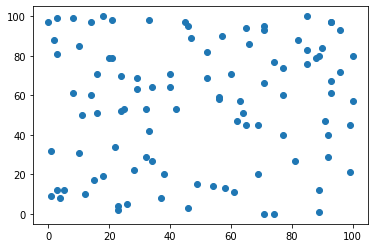

In [38]:
plt.scatter(X1, X2)

In [39]:
tranning_data = [[x1, x2] for x1, x2 in zip(X1, X2)]

In [40]:
tranning_data

[[65, 45],
 [69, 20],
 [21, 79],
 [66, 86],
 [28, 22],
 [11, 50],
 [92, 29],
 [47, 89],
 [57, 90],
 [46, 3],
 [71, 66],
 [77, 60],
 [45, 97],
 [99, 45],
 [74, 0],
 [71, 93],
 [88, 79],
 [23, 2],
 [5, 12],
 [89, 12],
 [32, 53],
 [96, 72],
 [63, 57],
 [65, 94],
 [34, 64],
 [58, 13],
 [89, 1],
 [96, 93],
 [10, 31],
 [69, 45],
 [0, 97],
 [40, 64],
 [64, 51],
 [15, 17],
 [26, 5],
 [16, 51],
 [24, 52],
 [62, 47],
 [60, 71],
 [38, 20],
 [25, 53],
 [18, 19],
 [10, 85],
 [71, 0],
 [16, 71],
 [12, 10],
 [24, 70],
 [21, 98],
 [77, 74],
 [34, 27],
 [3, 99],
 [71, 95],
 [8, 99],
 [33, 98],
 [56, 58],
 [92, 40],
 [100, 57],
 [3, 12],
 [93, 67],
 [81, 27],
 [85, 83],
 [93, 61],
 [93, 97],
 [52, 82],
 [90, 84],
 [91, 47],
 [22, 34],
 [49, 15],
 [100, 80],
 [46, 95],
 [8, 61],
 [82, 88],
 [52, 69],
 [74, 77],
 [3, 81],
 [1, 32],
 [14, 97],
 [85, 76],
 [54, 14],
 [4, 8],
 [99, 21],
 [1, 9],
 [37, 8],
 [18, 100],
 [29, 63],
 [20, 79],
 [42, 53],
 [29, 69],
 [61, 11],
 [23, 4],
 [56, 59],
 [32, 29],
 [14,

In [41]:
cluster = KMeans(n_clusters = 6, max_iter = 500)

In [42]:
cluster.fit(tranning_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
cluster.cluster_centers_

array([[18.44444444, 16.72222222],
       [73.35294118, 54.        ],
       [19.4       , 92.06666667],
       [71.69230769, 12.76923077],
       [26.0625    , 59.1875    ],
       [81.33333333, 85.0952381 ]])

In [44]:
cluster.labels_

array([1, 3, 2, 5, 0, 4, 3, 2, 5, 3, 1, 1, 2, 1, 3, 5, 5, 0, 0, 3, 4, 5,
       1, 5, 4, 3, 3, 5, 0, 1, 2, 4, 1, 0, 0, 4, 4, 1, 1, 0, 4, 0, 2, 3,
       4, 0, 4, 2, 5, 0, 2, 5, 2, 2, 1, 1, 1, 0, 5, 3, 5, 1, 5, 5, 5, 1,
       0, 3, 5, 2, 4, 5, 1, 5, 2, 0, 2, 5, 3, 0, 3, 0, 0, 2, 4, 2, 4, 4,
       3, 0, 1, 0, 4, 1, 5, 5, 5, 2, 4, 4])

In [45]:
from collections import defaultdict

In [46]:
centers = defaultdict(list)

In [47]:
centers

defaultdict(list, {})

In [48]:
for label, location in zip(cluster.labels_, tranning_data):
    centers[label].append(location)

In [49]:
centers

defaultdict(list,
            {1: [[65, 45],
              [71, 66],
              [77, 60],
              [99, 45],
              [63, 57],
              [69, 45],
              [64, 51],
              [62, 47],
              [60, 71],
              [56, 58],
              [92, 40],
              [100, 57],
              [93, 61],
              [91, 47],
              [52, 69],
              [56, 59],
              [77, 40]],
             3: [[69, 20],
              [92, 29],
              [46, 3],
              [74, 0],
              [89, 12],
              [58, 13],
              [89, 1],
              [71, 0],
              [81, 27],
              [49, 15],
              [54, 14],
              [99, 21],
              [61, 11]],
             2: [[21, 79],
              [47, 89],
              [45, 97],
              [0, 97],
              [10, 85],
              [21, 98],
              [3, 99],
              [8, 99],
              [33, 98],
              [46, 95],
              [3,

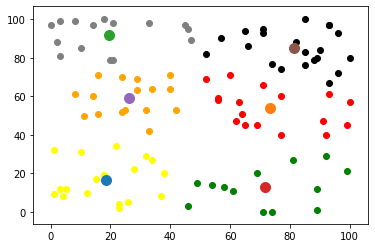

In [50]:
color = ['red', 'green', 'grey', 'black', 'yellow', 'orange']

for i, c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c=color[i])

for center in cluster.cluster_centers_:
    plt.scatter(*center, s=100)   